In [770]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
import seaborn as sns

In [771]:
data = pd.read_csv('Genetic mapping_exercise.csv', header=0)
#file = 'Dataset/Genetic mapping_exercise.xls'
#data = pd.read_excel(file)

# new line to concatenate
datadp = data.head(1)

# concatenate dataset to reset index
data = pd.concat([datadp, data], axis=0)

# reset index
data = data.reset_index()

# remove columns
data = data.drop(columns=['index','ID','Unnamed: 39','Unnamed: 40','Unnamed: 41'])
data = data.drop([0])

print(data.shape)
print(list(data.columns))
data

(1517, 38)
['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'Sexo']


,H1,H2,H3,H4,H5,H6,H7,H8,H9,N2,...,C1,C2,C3,C4,C5,C6,C7,C8,C9,Sexo
1,1,1,1.0,2,1,1,97,61,12,22,...,0,0,0,0,0,0,0,0,0,2.0
2,1,2,1.0,1,1,2,20,32,20,75,...,2,2,1,2,2,1,2,1,1,2.0
3,1,1,1.0,1,0,2,16,35,20,59,...,2,2,2,2,2,2,2,2,2,1.0
4,1,9,1.0,0,2,2,20,26,20,48,...,2,1,2,2,2,2,2,2,2,2.0
5,2,2,1.0,0,1,4,98,25,12,42,...,0,0,0,0,0,0,0,0,0,2.0
6,2,2,1.0,5,0,7,8,59,10,0,...,2,2,2,2,2,2,2,2,2,1.0
7,2,1,1.0,3,1,7,8,46,10,0,...,2,2,2,2,2,2,2,2,2,1.0
8,2,2,1.0,4,0,7,5,99,16,60,...,2,2,2,2,2,2,2,2,2,2.0
9,2,2,1.0,3,2,7,6,57,10,0,...,2,2,2,2,2,2,2,2,2,2.0
10,1,2,1.0,2,1,1,8,64,14,38,...,0,0,0,0,0,0,0,0,0,2.0


In [772]:
# organizar dados
data_pred = data.sort_values(['Sexo'])

# separar os dados 'NaN'
data_pred = data_pred.tail(92)
#data_pred = data_pred.astype('float64')

# drop 'NaN' no dataset para traino e test
data = data.dropna()

# converter dados para binarios
data['Sexo'] = data['Sexo'].map({1.0: 0, 2.0: 1})

# converter os dados para float
data = data.astype('float64')
print(data.shape)
data

(1425, 38)


c:\python\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,H1,H2,H3,H4,H5,H6,H7,H8,H9,N2,...,C1,C2,C3,C4,C5,C6,C7,C8,C9,Sexo
1,1.0,1.0,1.0,2.0,1.0,1.0,97.0,61.0,12.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,2.0,1.0,1.0,1.0,2.0,20.0,32.0,20.0,75.0,...,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,0.0,2.0,16.0,35.0,20.0,59.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0
4,1.0,9.0,1.0,0.0,2.0,2.0,20.0,26.0,20.0,48.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
5,2.0,2.0,1.0,0.0,1.0,4.0,98.0,25.0,12.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,2.0,2.0,1.0,5.0,0.0,7.0,8.0,59.0,10.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0
7,2.0,1.0,1.0,3.0,1.0,7.0,8.0,46.0,10.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0
8,2.0,2.0,1.0,4.0,0.0,7.0,5.0,99.0,16.0,60.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
9,2.0,2.0,1.0,3.0,2.0,7.0,6.0,57.0,10.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
10,1.0,2.0,1.0,2.0,1.0,1.0,8.0,64.0,14.0,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [773]:
cols=['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'N2', 'N3', 'N4', 'N5', 'N6',
      'N7', 'N8', 'N9', 'N10', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'C1',
      'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']

X=data[cols]
y=data['Sexo']

In [774]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 400)

In [775]:
from sklearn.neighbors import KNeighborsClassifier
#Instanciamos a classe.
#Nada impede de treiná-lo logo em seguida.
 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [776]:
#Aqui armazeno as predições do algoritmo
#No caso aplicamos ele ao conjunto de teste
#Essa variavel servira para fazermos algumas métricas.
predictions = knn.predict(X_test)

In [777]:
# accuracy of training
from sklearn import metrics
metrics.accuracy_score(y_test,predictions)

0.5625

In [778]:
#metrics.confusion_matrix(y_test,predictions)

In [779]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[ 73  88]
 [ 87 152]]


In [780]:
# Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

        0.0       0.46      0.45      0.45       161
        1.0       0.63      0.64      0.63       239

avg / total       0.56      0.56      0.56       400



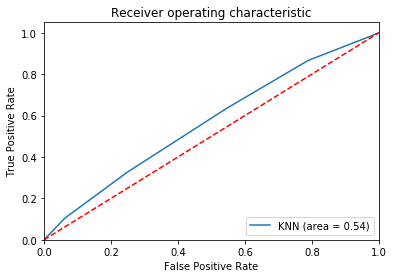

In [781]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

knn_roc_auc = roc_auc_score(y_test, knn.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('KNN_ROC')
plt.show()

In [782]:
'''# dropar coluna sexo para gerar resultado de predição
data_pred = data_pred.drop(columns=['Sexo'])

# resultado de predição
y_predicted = predictions.predict(data_pred)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(predictions.score(X_test, y_test)))'''

"# dropar coluna sexo para gerar resultado de predição\ndata_pred = data_pred.drop(columns=['Sexo'])\n\n# resultado de predição\ny_predicted = predictions.predict(data_pred)\nprint('Accuracy of logistic regression classifier on test set: {:.2f}'.format(predictions.score(X_test, y_test)))"

In [783]:
# dropar coluna sexo para gerar resultado de predição
data_pred = data_pred.drop(columns=['Sexo'])

# resetar index
data_pred = data_pred.reset_index()
data_pred

# converter em DataFrame a predição
predictions = pd.DataFrame({'Sexo': predictions})

# concatena os dados
data_result = pd.concat([data_pred,predictions], axis=1)

# converter dados para 1 e 2
data_result['Sexo'] = data_result['Sexo'].map({0.0: 1, 1.0: 2})

# export dataset
data_result.to_excel('k-means_genetic_exercise.xlsx','Sheet1')
data_result

,index,H1,H2,H3,H4,H5,H6,H7,H8,H9,...,C1,C2,C3,C4,C5,C6,C7,C8,C9,Sexo
0,13.0,1.0,2.0,1.0,0.0,0.0,1.0,11.0,33.0,15.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2
1,18.0,1.0,1.0,1.0,2.0,2.0,6.0,0.0,77.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,28.0,2.0,2.0,1.0,0.0,2.0,5.0,12.0,28.0,12.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2
3,35.0,1.0,1.0,1.0,3.0,2.0,0.0,18.0,44.0,17.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2
4,48.0,1.0,2.0,3.0,3.0,2.0,2.0,8.0,64.0,12.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2
5,55.0,1.0,2.0,3.0,0.0,1.0,4.0,16.0,43.0,20.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
6,62.0,1.0,3.0,3.0,0.0,2.0,2.0,12.0,33.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
7,63.0,1.0,2.0,3.0,1.0,0.0,6.0,12.0,31.0,16.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2
8,72.0,2.0,2.0,3.0,3.0,1.0,8.0,98.0,67.0,9.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,2
9,73.0,2.0,1.0,3.0,2.0,1.0,2.0,98.0,61.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
